# 0 - Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
input_directory = '/content/drive/MyDrive/⭐ Study projects/MindX/Class 1 - Data for Everyone/Final/Presentation/Input data/'
output_directory = '/content/drive/MyDrive/⭐ Study projects/MindX/Class 1 - Data for Everyone/Final/Presentation/Output data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1 - Setting

In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)

# 2 - Load data

In [ ]:
# Source: https://www.kaggle.com/datasets/gregorut/videogamesales
game_sale_data = pd.read_csv(input_directory + 'Game Sale data/vgsales.csv')

In [ ]:
# Source: https://docs.google.com/spreadsheets/d/1QqYwEdNv4_rDX0F-HgIKUESDBr14dfDgCYCMbdv-of0/edit#gid=336730369
console_data = pd.read_csv(input_directory + 'Console data/Game Console Database - Cleaned data.csv')

In [ ]:
# Source: https://www.kaggle.com/datasets/thedevastator/the-best-atari-2600-games-of-all-time
# Load dữ liệu và kết hợp thành 1 dataframe
atari2600_data1 = pd.read_csv(input_directory + 'Atari 2600 games data/df_3.csv')[['Atari title','Year']]
atari2600_data1.columns = ['Name','year_add']

atari2600_data2 = pd.read_csv(input_directory + 'Atari 2600 games data/df_5.csv')[['Game Title','Year']]
atari2600_data2.columns = ['Name','year_add']

atari2600_data3 = pd.read_csv(input_directory + 'Atari 2600 games data/df_7.csv')[['Title','Year']]
atari2600_data3.columns = ['Name','year_add']

atari2600_data_all = pd.concat([atari2600_data1,atari2600_data2,atari2600_data3])
atari2600_data_all = atari2600_data_all.drop_duplicates()

# 3 - Data Summary

Columns
- **Name**: The games name
- **Platform**: Platform of the games release (i.e. PC,PS4, etc.)
- **Year**: Year of the game's release
- **Genre**: Genre of the game
- **Publisher**: Publisher of the game
- **NA_Sales**: Sales in North America (in millions)
- **EU_Sales**: Sales in Europe (in millions)
- **JP_Sales**: Sales in Japan (in millions)
- **Other_Sales**: Sales in the rest of the world (in millions)
- **Global_Sales**: Total worldwide sales.

In [ ]:
# Dữ liệu có hơn 16k dòng và 11 cột
game_sale_data.shape

(16598, 11)

In [ ]:
# Kiểm tra type, bảng dữ liệu tốt, chỉ cần convert Year sang integer
game_sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
# Kiểm tra value distribution của các cột dữ liệu số
game_sale_data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# 4 - Clean data

## 4.1 - Null Year

In [ ]:
game_sale_data['Year'].isna().sum()

271

### Kiểm tra ảnh hưởng của việc bỏ null đối với Global Sale của các hệ máy


In [ ]:
null_year_data = game_sale_data[game_sale_data['Year'].isna()]

Tỉ lệ doanh thu bị ảnh hưởng của các hệ máy nếu xoá null year.
10.83% ------------- 2600
0.48% ------------- 3DS
0.43% ------------- DS
0.40% ------------- GB
1.55% ------------- GBA
1.11% ------------- GC
0.31% ------------- N64
1.46% ------------- PC
0.45% ------------- PS
1.77% ------------- PS2
0.89% ------------- PS3
1.54% ------------- PSP
0.48% ------------- PSV
1.82% ------------- Wii
1.06% ------------- X360
2.39% ------------- XB


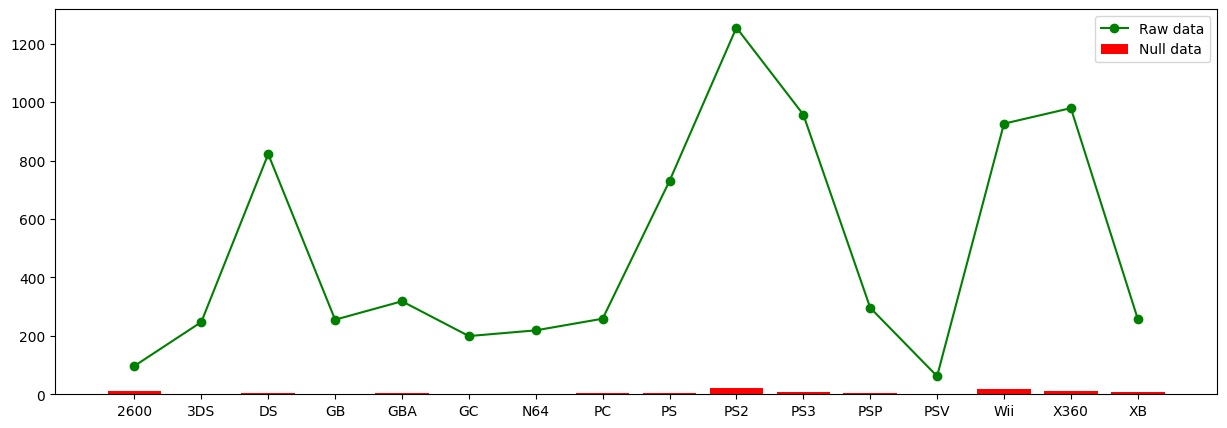

In [ ]:
# Data trước khi bỏ null
raw_console_sale = (game_sale_data[game_sale_data['Platform'].isin(null_year_data['Platform'].unique())]
          .groupby('Platform')['Global_Sales'].sum()
          .reset_index())

# Data null sẽ bị bỏ
null_console_sale = (game_sale_data[game_sale_data['Year'].isna()]
           .groupby('Platform')['Global_Sales'].sum()
           .reset_index())

# Print nhận xét
print("Tỉ lệ doanh thu bị ảnh hưởng của các hệ máy nếu xoá null year.")
platforms = null_year_data['Platform'].unique()
platforms.sort()
for platform in platforms:
  percent = (null_console_sale.loc[null_console_sale['Platform'] == platform, 'Global_Sales'].iloc[0] /
              raw_console_sale.loc[raw_console_sale['Platform'] == platform, 'Global_Sales'].iloc[0])
  print(f"{percent:.2%} ------------- {platform}")


# plot chart
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(raw_console_sale['Platform'] , raw_console_sale['Global_Sales'] , label = "Raw data", color = 'green', marker = 'o')
plt.bar(null_console_sale['Platform'], null_console_sale['Global_Sales'], label = "Null data", color = 'red')
plt.legend()
plt.show()

#### Nhận xét và bổ sung dữ liệu cho Atari 2600

- Có thể thấy, sau khi clean đi các giá trị năm bị null hầu hết các hệ máy sẽ ít bị ảnh hưởng đến doanh thu, ngoại trừ hệ máy Atari 2600

- Để các dữ liệu này không bị thất thoát, ta sẽ dùng thêm dữ liệu game Atari 2600 ở [Atari 2600 Games](https://www.kaggle.com/datasets/thedevastator/the-best-atari-2600-games-of-all-time)


In [ ]:
# Merge bảng
game_sale_data = game_sale_data.merge(atari2600_data_all, how = 'left')

# Update các giá trị của cột year_add vào cột Year
game_sale_data.loc[(game_sale_data['Year'].isna()) & (game_sale_data['Platform'] == '2600'), 'Year'] = game_sale_data['year_add']

# Bỏ cột year_add sau khi update xong
game_sale_data.drop(columns = 'year_add', inplace=True)

In [ ]:
# Sau khi kiểm tra lại thì có một cột có năm đang là '1990/1992'
print(game_sale_data['Year'].unique())

game_sale_data[game_sale_data['Year'] == '1990/1992']

[2006.0 1985.0 2008.0 2009.0 1996.0 1989.0 1984.0 2005.0 1999.0 2007.0
 2010.0 2013.0 2004.0 1990.0 1988.0 2002.0 2001.0 2011.0 1998.0 2015.0
 2012.0 2014.0 1992.0 1997.0 1993.0 1994.0 1982.0 2003.0 1986.0 2000.0 nan
 1995.0 2016.0 1991.0 1981.0 1987.0 1980.0 1983.0 '1980' '1977' '1982'
 '1981' '1978' '1979' 2020.0 '1990/1992' 2017.0]


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7369,7371,Ghostbusters II,2600,1990/1992,Action,Activision,0.2,0.01,0.0,0.0,0.21


In [ ]:
# Ta sẽ chuyển giá trị này thành năm 1990
game_sale_data.loc[game_sale_data['Year'] == '1990/1992', 'Year'] = '1990'

### Kiểm tra ảnh hưởng của việc bỏ null đối với Global Sale của các hãng sản xuất

In [ ]:
# Data trước khi bỏ null
raw_pub_sale = (game_sale_data[game_sale_data['Publisher'].isin(null_year_data['Publisher'].unique())]
          .groupby('Publisher').agg(Global_Sales_raw = ('Global_Sales','sum'))
          .reset_index())

# Data null sẽ bị bỏ
null_pub_sale = (game_sale_data[game_sale_data['Year'].isna()]
           .groupby('Publisher').agg(Global_Sales_null = ('Global_Sales','sum'))
           .reset_index())

# Tạo thành bảng so sánh
pub_sale = raw_pub_sale.merge(null_pub_sale)
pub_sale['affected_%'] = (pub_sale['Global_Sales_null']/pub_sale['Global_Sales_raw']*100).round(2)

# Chỉ kiểm tra các hãng bị ảnh hưởng hơn 5% doanh số
pub_sale[pub_sale['affected_%']>=5].sort_values(by = 'affected_%', ascending = False)

,Publisher,Global_Sales_raw,Global_Sales_null,affected_%
34,Sears,0.21,0.21,100.00
42,TopWare Interactive,0.12,0.08,66.67
45,Unknown,34.66,21.02,60.65
18,Home Entertainment Suppliers,0.71,0.26,36.62
36,Slitherine Software,0.21,0.05,23.81
22,Kalypso Media,2.45,0.50,20.41
16,Funsta,0.20,0.04,20.00
4,Black Bean Games,3.29,0.42,12.77
25,MTV Games,20.97,2.11,10.06
47,Warner Bros. Interactive Entertainment,153.89,11.55,7.51


In [ ]:
# Top 10 hãng có sale lớn nhất
raw_pub_sale.sort_values(by = 'Global_Sales_raw',ascending = False).head(10)

,Publisher,Global_Sales_raw
30,Nintendo,1786.56
13,Electronic Arts,1110.32
0,Activision,727.46
37,Sony Computer Entertainment,607.50
43,Ubisoft,474.72
41,Take-Two Interactive,399.54
40,THQ,340.77
23,Konami Digital Entertainment,283.64
35,Sega,272.99
29,Namco Bandai Games,254.09


#### Nhận xét

- Những hãng bị ảnh hưởng doanh số đều không nằm trong top 10 các hãng có Global Sale lớn nhất, vì thế nếu có bỏ đi các giá trị này thì cũng không ảnh hưởng gì

### Drop các giá trị year null còn lại

In [ ]:
# Còn lại 256 giá trị year null không thể xác định được
game_sale_data['Year'].isna().sum()

256

In [ ]:
# Ta sẽ lọc hết các dòng year null này
game_sale_data = game_sale_data[game_sale_data['Year'].notna()]

## 4.2 - Null Publisher

In [ ]:
# Kiểm tra số lượng dòng bị null
game_sale_data['Publisher'].isna().sum()

36

In [ ]:
# Trong quá trình "Kiểm tra ảnh hưởng của việc bỏ null đối với Global Sale của các hãng sản xuất"
# Ta thấy có Pulisher giá trị là 'Unknown'
pub_sale.sort_values(by = 'affected_%', ascending = False).head(3)

,Publisher,Global_Sales_raw,Global_Sales_null,affected_%
34,Sears,0.21,0.21,100.00
42,TopWare Interactive,0.12,0.08,66.67
45,Unknown,34.66,21.02,60.65


In [ ]:
# Ta có thể chuyển các giá trị null của Publisher thành 'Unknown' như data có sẵn, để tránh việc thất thoát dữ liệu
game_sale_data.loc[game_sale_data['Publisher'].isna(), 'Publisher'] = 'Unknown'

## 4.3 - Type Casting

In [ ]:
# Như đã nhận xét ở Data Summary, ta chỉ cần convert Year sang integer để tiện cho việc thể hiện dữ liệu
game_sale_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16342 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16342 non-null  int64  
 1   Name          16342 non-null  object 
 2   Platform      16342 non-null  object 
 3   Year          16342 non-null  object 
 4   Genre         16342 non-null  object 
 5   Publisher     16342 non-null  object 
 6   NA_Sales      16342 non-null  float64
 7   EU_Sales      16342 non-null  float64
 8   JP_Sales      16342 non-null  float64
 9   Other_Sales   16342 non-null  float64
 10  Global_Sales  16342 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [ ]:
game_sale_data['Year'] = game_sale_data['Year'].astype(int)

## 4.4 - Chỉ lấy data 2015 trở về trước

Vì dữ liệu này được cập nhật lần cuối vào tháng 10 năm 2016, ta có thể thấy sale năm 2016 không đầy đủ và sau 2016 gần như không có dữ liệu. Vì thế ta sẽ drop các data các năm sau 2015.

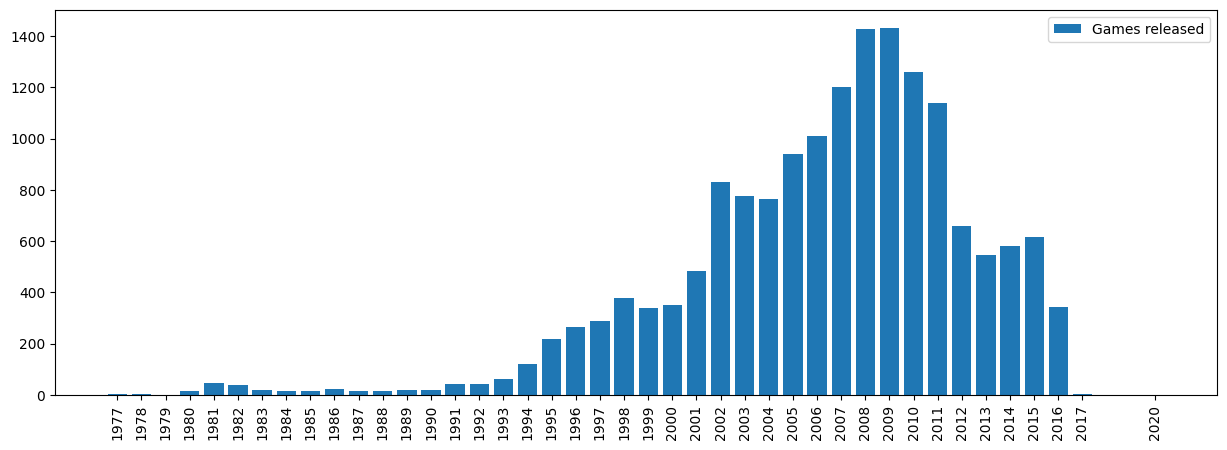

In [ ]:
# Số lượng game release mỗi năm
year_released_count = game_sale_data['Year'].value_counts().reset_index()

# plot chart
fig, ax = plt.subplots(figsize=(15, 5))
plt.bar(year_released_count['index'], year_released_count['Year'], label = "Games released")
plt.xticks(year_released_count['index'], rotation = 90)
plt.legend()
plt.show()

In [ ]:
# Lọc chỉ lấy các năm trước 2015
game_sale_data = game_sale_data[game_sale_data['Year'] < 2016]

## 4.5 - Kiểm tra game sản xuất từng năm của mỗi hệ máy

In [ ]:
# Đếm số lượng game của từng Platform được sản xuất mỗi năm
platform_year_count = game_sale_data.groupby(['Platform','Year']).agg(Count = ('Name','count')).reset_index()

# Kết hợp dữ liệu tên, năm phân phối, năm kết thúc
data_for_pivot = console_data.merge(platform_year_count,
                                    how = 'left',
                                    on = 'Platform')

# Chuyển dữ liệu thành dạng pivot table
pivot_game_per_year = data_for_pivot.pivot_table(index=['Platform Developer','Platform','Full Name','Released','Discontinued'],
                                                    columns='Year',
                                                    values='Count',
                                                    fill_value=0).replace(0,'').sort_values(by = 'Released').reset_index()

pivot_game_per_year

Year,Platform Developer,Platform,Full Name,Released,Discontinued,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Atari,2600,Atari 2600,1977,1992.0,3,3,1,14,47,37,11,1,1,2,6,2,2,1,,,,,,,,,,,,,,,,,,,,,,,,,
1,Nintendo,NES,Nintendo Entertainment System,1983,1995.0,,,,,,,6,13,11,19,10,11,5,8,7,3,4,1,,,,,,,,,,,,,,,,,,,,,
2,NEC,TG16,TurboGrafx-16,1987,1994.0,,,,,,,,,,,,,,,,,,,2,,,,,,,,,,,,,,,,,,,,
3,SEGA,GEN,Sega Genesis,1988,1997.0,,,,,,,,,,,,,,1,1,6,7,12,,,,,,,,,,,,,,,,,,,,,
4,Nintendo,GB,Game Boy,1989,2003.0,,,,,,,,,,,,1,10,3,9,7,,3,4,6,8,8,11,17,10,,,,,,,,,,,,,,
5,SEGA,GG,GameGear,1990,1997.0,,,,,,,,,,,,,,,,1,,,,,,,,,,,,,,,,,,,,,,,
6,SNK Corporation,NG,Neo Geo,1990,2004.0,,,,,,,,,,,,,,,,,2,4,4,2,,,,,,,,,,,,,,,,,,,
7,Nintendo,SNES,Super Nintendo Entertainment System,1990,1999.0,,,,,,,,,,,,,,4,24,21,46,53,54,30,4,2,1,,,,,,,,,,,,,,,,
8,SEGA,SCD,Sega CD,1991,1996.0,,,,,,,,,,,,,,,,,1,5,,,,,,,,,,,,,,,,,,,,,
9,The 3DO Company,3DO,3DO Interactive Multiplayer,1994,1996.0,,,,,,,,,,,,,,,,,,1,2,,,,,,,,,,,,,,,,,,,,


In [ ]:
# Kiểm tra dữ liệu của máy Nintendo DS
pivot_game_per_year[pivot_game_per_year['Full Name'] == 'Nintendo DS']

Year,Platform Developer,Platform,Full Name,Released,Discontinued,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
21,Nintendo,DS,Nintendo DS,2004,2014.0,,,,,,,,,1,,,,,,,,,,,,,,,,,,,23,118,202,377,492,405,326,153,25,9,1,


In [ ]:
weird_ds_game = game_sale_data[(game_sale_data['Platform'] == 'DS') & (game_sale_data['Year'] == 1985)]
weird_ds_game

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15867,15870,Strongest Tokyo University Shogi DS,DS,1985,Action,Mycom,0.0,0.0,0.02,0.0,0.02


So với ngày sản xuất máy, Nintendo DS không thể có game vào năm 1985, vì thế ta sẽ loại dữ liệu này khỏi data

In [ ]:
game_sale_data.drop(weird_ds_game.index, inplace=True)

## 4.6 Update value sale

In [ ]:
# Chuyển nhân số sale với 1000,000 để thể hiện đúng số
for col in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']:
  game_sale_data[col] = (game_sale_data[col] * 1000000).round(0).astype(int)

# 5 - EDA test

### 5.1 - Số lượng game release theo genre mỗi năm

In [ ]:
# Group
released_by_Genre_yearly = (game_sale_data.groupby(['Genre','Year'])['Name'].count()
                            .reset_index()
                            [['Year','Name','Genre']]
                            .sort_values(by = ['Year','Name'], ascending = False)
                            .drop_duplicates(subset = 'Year', keep = 'first'))

# Xuất file ra Drive
released_by_Genre_yearly.to_csv(output_directory + 'top_released_by_Genre_yearly.csv', index = False)

# Check data
print(released_by_Genre_yearly.head())
print("---------------------------------------------------")
print(released_by_Genre_yearly.groupby('Genre')['Year'].agg(lambda x: ', '.join(x.astype(str))))

    Year  Name   Genre
38  2015   255  Action
37  2014   186  Action
36  2013   148  Action
35  2012   266  Action
34  2011   239  Action
---------------------------------------------------
Genre
Action      2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 1990, 1986, 1983, 1982, 1981, 1979, 1978, 1977
Fighting                                                                                                          1995, 1994, 1993, 1992
Misc                                                                                                                                1980
Platform                                                                                                                      1988, 1985
Puzzle                                                                                                                        1989, 1984
Sports                                                                              2002, 2001, 2000, 1999, 1998, 1997,

### 5.2 - Số lượng game release theo platform mỗi năm

In [ ]:
# Group
released_by_Platform_yearly = (game_sale_data.groupby(['Platform','Year'])['Name'].count()
                            .reset_index()
                            [['Year','Name','Platform']]
                            .sort_values(by = ['Year','Name'], ascending = False)
                            .drop_duplicates(subset = 'Year', keep = 'first'))

# Xuất file ra Drive
released_by_Platform_yearly.to_csv(output_directory + 'top_released_by_Platform_yearly.csv', index = False)

# Check data
print(released_by_Platform_yearly.head())
print("---------------------------------------------------")
print(released_by_Platform_yearly.groupby('Platform')['Year'].agg(lambda x: ', '.join(x.astype(str))))

     Year  Name Platform
156  2015   137      PS4
152  2014   108      PS3
151  2013   127      PS3
150  2012   148      PS3
149  2011   216      PS3
---------------------------------------------------
Platform
2600    1983, 1982, 1981, 1980, 1979, 1978, 1977
DS                        2010, 2009, 2008, 2007
GB                                          1989
NES           1990, 1988, 1987, 1986, 1985, 1984
PS            2000, 1999, 1998, 1997, 1996, 1995
PS2           2006, 2005, 2004, 2003, 2002, 2001
PS3                       2014, 2013, 2012, 2011
PS4                                         2015
SNES                      1994, 1993, 1992, 1991
Name: Year, dtype: object


### 5.3 - Doanh thu game release theo genre mỗi năm

In [ ]:
# Group
sale_by_Genre_yearly = (game_sale_data.groupby(['Genre','Year'])['Global_Sales'].sum()
                            .reset_index()
                            [['Year','Global_Sales','Genre']]
                            .sort_values(by = ['Year','Global_Sales'], ascending = False)
                            .drop_duplicates(subset = 'Year', keep = 'first'))

# Xuất file ra Drive
sale_by_Genre_yearly.to_csv(output_directory + 'top_sale_by_Genre_yearly.csv', index = False)

# Check data
print(sale_by_Genre_yearly.head())
print("---------------------------------------------------")
print(sale_by_Genre_yearly.groupby('Genre')['Year'].agg(lambda x: ', '.join(x.astype(str))))

    Year  Global_Sales   Genre
38  2015      70700000  Action
37  2014      99020000  Action
36  2013     125220000  Action
35  2012     122040000  Action
34  2011     118960000  Action
---------------------------------------------------
Genre
Action          2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2005, 2004, 2003, 2002, 2001, 1986, 1981, 1979, 1977
Fighting                                                                                                        1992, 1987
Platform                                                                    1995, 1994, 1993, 1991, 1990, 1988, 1985, 1983
Puzzle                                                                                                    1989, 1982, 1978
Racing                                                                                                                1997
Role-Playing                                                                                                    1999, 1996
Shooter           

### 5.4 - Doanh thu game release theo platform mỗi năm

In [ ]:
# Group
sale_by_Platform_yearly = (game_sale_data.groupby(['Platform','Year'])['Global_Sales'].sum()
                            .reset_index()
                            [['Year','Global_Sales','Platform']]
                            .sort_values(by = ['Year','Global_Sales'], ascending = False)
                            .drop_duplicates(subset = 'Year', keep = 'first'))

# Xuất file ra Drive
sale_by_Platform_yearly.to_csv(output_directory + 'top_sale_by_Platform_yearly.csv', index = False)

# Check data
print(sale_by_Platform_yearly.head())
print("---------------------------------------------------")
print(sale_by_Platform_yearly.groupby('Platform')['Year'].agg(lambda x: ', '.join(x.astype(str))))

     Year  Global_Sales Platform
156  2015     115300000      PS4
155  2014      98760000      PS4
151  2013     117390000      PS3
150  2012     109490000      PS3
149  2011     159370000      PS3
---------------------------------------------------
Platform
2600    1982, 1981, 1980, 1979, 1978, 1977
GB                                    1989
NES     1988, 1987, 1986, 1985, 1984, 1983
PS      2000, 1999, 1998, 1997, 1996, 1995
PS2           2005, 2004, 2003, 2002, 2001
PS3                       2013, 2012, 2011
PS4                             2015, 2014
SNES          1994, 1993, 1992, 1991, 1990
Wii                 2009, 2008, 2007, 2006
X360                                  2010
Name: Year, dtype: object


### 5.5 - Top game sale theo từng khu vực

In [ ]:
# Unpivot data
game_sale_unpivot = (pd.melt(game_sale_data,
                             id_vars = ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher'],
                             value_vars = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])
                             .sort_values(by = 'Rank'))

# Rename columns
game_sale_unpivot.columns = ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Region', 'Sale']

# Clean
game_sale_unpivot['Region'] = game_sale_unpivot['Region'].str.replace('_Sales','')
game_sale_unpivot = game_sale_unpivot[game_sale_unpivot['Sale'] > 0]

# Xuất ra drive
game_sale_unpivot.to_csv(output_directory + 'game_sale_data_unpivot.csv', index = False)

In [ ]:
# Check data
for region in ['JP','NA','EU','Other','Global']:
  print(f'Top 5 game sales in {region} all time ---------------------------------------------------')
  print(game_sale_unpivot[game_sale_unpivot['Region'] == region]
                          .sort_values(by = 'Sale', ascending = False)
                          .head(5)
                          .to_string(index=False)
        )
  print()
  print()

Top 5 game sales in JP all time ---------------------------------------------------
 Rank                          Name Platform  Year        Genre Publisher Region     Sale
    5      Pokemon Red/Pokemon Blue       GB  1996 Role-Playing  Nintendo     JP 10220000
   13   Pokemon Gold/Pokemon Silver       GB  1999 Role-Playing  Nintendo     JP  7200000
    2             Super Mario Bros.      NES  1985     Platform  Nintendo     JP  6810000
    7         New Super Mario Bros.       DS  2006     Platform  Nintendo     JP  6500000
   21 Pokemon Diamond/Pokemon Pearl       DS  2006 Role-Playing  Nintendo     JP  6040000


Top 5 game sales in NA all time ---------------------------------------------------
 Rank              Name Platform  Year    Genre Publisher Region     Sale
    1        Wii Sports      Wii  2006   Sports  Nintendo     NA 41490000
    2 Super Mario Bros.      NES  1985 Platform  Nintendo     NA 29080000
   10         Duck Hunt      NES  1984  Shooter  Nintendo     NA 269

### 5.6 Game nổi tiếng nhất ở từng khu vực

In [ ]:
game_sale_unpivot.sort_values(by = ['Region','Sale'], ascending = False).drop_duplicates(subset = 'Region', keep = 'first')

,Rank,Name,Platform,Year,Genre,Publisher,Region,Sale
47996,18,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,Other,10570000
0,1,Wii Sports,Wii,2006,Sports,Nintendo,NA,41490000
31990,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,JP,10220000
63972,1,Wii Sports,Wii,2006,Sports,Nintendo,Global,82740000
15993,1,Wii Sports,Wii,2006,Sports,Nintendo,EU,29020000


# 99 - Xuất file cho Power BI

In [ ]:
game_sale_data.sort_values(by = 'Global_Sales', ascending = False).head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41490000,29020000,3770000,8460000,82740000
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29080000,3580000,6810000,770000,40240000
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000,12880000,3790000,3310000,35820000
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000,11010000,3280000,2960000,33000000
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000,8890000,10220000,1000000,31370000


In [ ]:
# Output localtion: https://drive.google.com/drive/folders/1a3kAgyMUgUBJMdM-XPTK5dWR-_uLvh35
game_sale_data.to_csv(output_directory + 'game_sale_data_cleaned.csv', index = False)
console_data.to_csv(output_directory +   'console_data.csv', index = False)